<a href="https://colab.research.google.com/github/fluorescentlightpower/mifi_homework/blob/main/ANOVA_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Однофакторный дисперсионный анализ (ANOVA)"

**Инструкции:**
- Скачайте этот файл и заполните ячейки с кодом и текстовыми выводами.
- В каждой задаче требуется:
  1) короткая формулировка метода и обоснование,
  2) код/расчеты,
  3) результаты (статистика, p-value, CI),
  4) содержательный вывод.
- Используйте `scipy`, `statsmodels`, `pingouin` или `scikit-posthocs` по желанию. При нарушении допущений объясните, какие альтернативы применили.

Формат сдачи: `.ipynb` с заполненными ячейками и выводами.

In [1]:
!pip install pingouin

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.stats.oneway as smow
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import FTestAnovaPower

### Задание 1. Сопоставление статистик

Вам предложены описания ситуаций и статистических процедур. Для каждой ситуации укажите наилучшую применимую статистику из списка: `z-test`, `t-test`, `Welch t-test`, `F-test` (сравнение дисперсий), `χ^2` (goodness-of-fit), `ANOVA (one-way)`, `Tukey HSD`, `Levene`.

Ситуации:
1) Необходимо проверить, отличается ли средний объем дозы от заданного значения, известна дисперсия производства (укажите двусторонний/односторонний тест).
2) Сравнить средние двух независимых групп при неизвестных, но равных дисперсиях.
3) Сравнить средние двух независимых групп при неизвестных и неравных дисперсиях.
4) Оценить, одинаковы ли средние в трех и более группах.
5) Проверить, согласуются ли наблюдаемые частоты с распределением Пуассона.

**Требуется:** кратко объясните выбор для каждой ситуации (1—2 предложения).


1. Когда нужно проверить, отличается ли среднее значение от заданного и известна дисперсия, используют z-тест. Он бывает двусторонний, если важно любое отклонение, и односторонний, если важно оценить отклонение только в одну сторону.

2. Чтобы сравнить средние двух независимых групп, когда дисперсии неизвестны, но предполагаются равными, используют обычный t-тест Стьюдента.

3. Чтобы сравнить средние двух независимых групп, когда дисперсии неизвестны и могут быть разными, используют t-тест Уэлча.

4. Чтобы проверить, одинаковы ли средние в трех или более группах, используют однофакторный дисперсионный анализ (one-way ANOVA).

5. Чтобы проверить, согласуются ли наблюдаемые частоты с теоретическим распределением (например, Пуассона), используют критерий хи-квадрат на согласие (goodness-of-fit).

### Задание 2. Тест для дозатора (z-test, двусторонний)

Инженерная задача. Дозатор рассчитывает среднюю дозу 3.00 г. Получено $n=50$ измерений со средним $\overline X=3.005$ и известным стандартным отклонением процесса $\sigma=0.015$.

а) Проведите двусторонний z-тест для проверки $H_0:\,\mu=3.00$ при $\alpha=0.05$.

б) Постройте 95% доверительный интервал для $\mu$.

в) Сделайте практический вывод для инженера: нужно ли перенастраивать дозатор?

**Требуется:** формулы расчета, численные значения (z_obs, p-value, CI), вывод.


In [3]:
mu0 = 3.00
xbar = 3.005
sigma = 0.015
n = 50
alpha = 0.05

# Стандартная ошибка
SE = sigma/(n**0.5)

# z-статистика
z_obs = (xbar - mu0)/SE

# двусторонний p-value через scipy
p_value = 2 * (1 - st.norm.cdf(z_obs))

# ДИ 95%
z_crit = st.norm.ppf(1 - alpha/2)
delta = z_crit * SE
CI = (xbar - delta, xbar + delta)

# Вывод
print("Z-тест")
print(f"z_obs = {z_obs:.4f}")
print(f"p-value = {p_value:.5f}")
print()
print("95% доверительный интервал мат. ожидания:")
print(f"({CI[0]:.3f}, {CI[1]:.3f})")

Z-тест
z_obs = 2.3570
p-value = 0.01842

95% доверительный интервал мат. ожидания:
(3.001, 3.009)


$$
\mu_0 = 3.00,\quad \overline X = 3.005,\quad \sigma = 0.015,\quad n = 50,\quad \alpha = 0.05
$$

Стандартная ошибка среднего:

$$
\frac{\sigma}{\sqrt{n}} = \frac{0,015}{\sqrt{50}} \approx 0,00212
$$


### **a) Двусторонний z-тест для \($H_0: \mu = 3,00$\)**

Гипотезы:

$$
H_0:\ \mu = 3,00,\qquad H_1:\ \mu \neq 3,00
$$

Статистика теста:

$$
z = \frac{\overline X - \mu}{\sigma / \sqrt{n}}
= \frac{3,005 - 3,00}{0,015 / \sqrt{50}}
= \frac{0,005}{0,00212} \approx 2,36
$$

Критическое значение:

$$
z_{0,975} = 1,96
$$

Так как $(z_{\text{obs}} = 2,36 > 1,96)$, нулевая гипотеза отвергается.

p-value:

$$
p = 2(1 - \Phi(2,36)) \approx 0,018
$$

**Итог:**

$$
z_{\text{obs}} \approx 2,36,\quad p \approx 0,018 < 0,05
\Rightarrow H_0\ отвергается.
$$

### **b) 95% доверительный интервал**

Формула:

$$
\overline X \pm z_{0,975} \cdot \frac{\sigma}{\sqrt{n}}
$$

Полуширина интервала:

$$
\Delta = 1,96 \cdot 0,00212 \approx 0,00416
$$

Границы интервала:

$$
(3,005 - 0,00416;\ 3,005 + 0,00416) \approx (3,0008;\ 3,0092)
$$

**95% ДИ:**

$$
(3,001;\ 3,009)\ \text{г}
$$


### **c) Практический вывод для инженера**

- Средняя доза статистически значимо выше 3,00 г, но $\mu$ близко к границе ДИ.  
- Смещение:

$$
3,005 - 3,000 = 0,005\ \text{г} = 5\ \text{мг}
$$

Это примерно:

$$
\frac{0,005}{0,015} \approx 0,33\ \sigma
$$

или около \(0,17\%\).

**Практический вывод:**  
Такой результат измерений не объясняется случайным разбросом. Если технологический допуск шире $\pm5$ г, перенастраивать дозатор не требуется, но стоит продолжать мониторинг. Если допуск более строгий, необходима перенастройка.


### Задание 3. Сравнение прочности материалов (t-test vs Welch)

Даны две независимые выборки прочности материалов (в MPa):

| Группа    | Наблюдения                                                                                                |
| :-------- | :-------------------------------------------------------------------------------------------------------- |
| A (n₁=15) | [51.99, 49.45, 52.59, 56.09, 49.06, 49.06, 56.32, 53.07, 48.12, 52.17, 48.15, 48.14, 50.97, 42.35, 43.10] |
| B (n₂=10) | [48.63, 45.92, 53.89, 46.55, 43.53, 60.79, 50.65, 52.41, 43.45, 48.73]                                    |

**Требуется:**

1. Проверить равенство дисперсий с помощью тестов **Levene** и классического **F-test**.
2. В зависимости от результата выполнить либо **pooled t-test**, либо **Welch t-test** для проверки
   $H_0:$ $\mu_A = \mu_B$ при $\alpha = 0.05$.
3. Построить 95% доверительный интервал для разности средних и интерпретировать.
4. Оформить заключение и вывод.


In [4]:
A = np.array([51.99,49.45,52.59,56.09,49.06,49.06,56.32,53.07,48.12,52.17,48.15,48.14,50.97,42.35,43.10])
B = np.array([48.63,45.92,53.89,46.55,43.53,60.79,50.65,52.41,43.45,48.73])

# Базовая статистика
nA, nB = len(A), len(B)
meanA, meanB = A.mean(), B.mean()
varA, varB = np.var(A, ddof=1), np.var(B, ddof=1)

print("Базовая статистика", "\n")
print("nA, nB =", nA, nB)
print("meanA, meanB =", meanA, meanB)
print("varA, varB =", varA, varB)
print("meanA - meanB =", meanA - meanB)
print()

# Проверка дисперсий: Levene и F-test
W, p_levene = st.levene(A, B)
F_stat = varA / varB
df1, df2 = nA - 1, nB - 1
p_F = 2 * min(st.f.cdf(F_stat, df1, df2), 1 - st.f.cdf(F_stat, df1, df2))

print("Levene test: W =", W, ", p =", p_levene)
print("F-test: F =", F_stat, ", p =", p_F)
print()

# t-тест (pooled)
t_stat, p_t = st.ttest_ind(A, B)

df = nA + nB - 2
sp2 = ((nA-1)*varA + (nB-1)*varB) / df
SE = (sp2*(1/nA + 1/nB))**0.5

print("t-test (pooled): t =", t_stat, ", p =", p_t)
print("df =", df, ", sp2 =", sp2, ", SE =", SE)
print()

# 95% ДИ для разности средних (mu_A - mu_B)
alpha = 0.05
t_crit = st.t.ppf(1 - alpha/2, df)
diff = meanA - meanB
CI_low, CI_high = diff - t_crit*SE, diff + t_crit*SE

print("95% CI for (mu_A - mu_B):")
print("(", CI_low, ",", CI_high, ")")

Базовая статистика 

nA, nB = 15 10
meanA, meanB = 50.042 49.455
varA, varB = 15.811831428571429 27.95762777777777
meanA - meanB = 0.5870000000000033

Levene test: W = 0.46759820348939146 , p = 0.5009261326774881
F-test: F = 0.5655641299130366 , p = 0.32710529669178184

t-test (pooled): t = 0.3170693676084761 , p = 0.7540512036025822
df = 23 , sp2 = 20.564534347826083 , SE = 1.8513298980204331

95% CI for (mu_A - mu_B):
( -3.242767682936272 , 4.416767682936278 )


In [5]:
t_stat, p_t = st.ttest_ind(A, B, equal_var=True)
t_stat, p_t

(np.float64(0.3170693676084761), np.float64(0.7540512036025822))

# Сравнение прочности материалов A и B

## **Исходные данные**

Объемы выборок:

$$
n_A = 15,\quad n_B = 10
$$

Средние значения:

$$
\overline X_A \approx 50,042,\quad \overline X_B \approx 49,455
$$

Выборочные дисперсии:

$$
s_A^2 \approx 15,812,\quad s_B^2 \approx 27,958
$$

Разность средних:

$$
\overline X_A - \overline X_B \approx 0,587\ \text{МПа}
$$

# **1. Проверка равенства дисперсий**

## **1.1. Тест Левена**

Гипотезы:

$$
H_0:\ \sigma_A^2 = \sigma_B^2, \qquad
H_1:\ \sigma_A^2 \neq \sigma_B^2
$$

Результаты:

- статистика: \( W = 0,468 \)
- p-value: \( p = 0,501 \)

**Вывод:** \( p > 0,05 \), различие дисперсий статистически не подтверждается.

## **1.2. Классический F-тест**

Статистика:

$$
F = \frac{s_A^2}{s_B^2}
    = \frac{15,812}{27,958}
    \approx 0,566
$$

Степени свободы:

$$
df_1 = 14,\qquad df_2 = 9
$$

Двустороннее p-value:

$$
p \approx 0,327
$$

**Вывод:** дисперсии также считаются равными (p > 0,05).

# **2. t-тест для сравнения средних (pooled)**

Так как дисперсии не различаются, следует использовать двухвыборочный t-тест с объединенной дисперсией.

## **2.1. Объединенная дисперсия**

$$
s_p^2 =
\frac{(n_A - 1)s_A^2 + (n_B - 1)s_B^2}{n_A + n_B - 2}
$$

$$
s_p^2 =
\frac{14 \cdot 15,812 + 9 \cdot 27,958}{23}
\approx 20,565
$$

Стандартная ошибка разности средних:

$$
SE =
\sqrt{s_p^2\left(\frac{1}{n_A} + \frac{1}{n_B}\right)}
\approx
1,851
$$

## **2.2. t-статистика**

$$
t_{\text{obs}} =
\frac{\overline X_A - \overline X_B}{SE}
=
\frac{0,587}{1,851}
\approx 0,317
$$

Степени свободы:

$$
df = n_A + n_B - 2 = 23
$$

p-value:

$$
p \approx 0,754
$$

**Вывод:** \( p > 0,05 \), средние прочности не различаются.

# **3. 95% доверительный интервал для разности средних**

Квантиль t-распределения:

$$
t_{0,975;\, 23} \approx 2,069
$$

Полуширина интервала:

$$
\Delta = t_{0,975;\,23} \cdot SE
\approx 2,069 \cdot 1,851
\approx 3,83
$$

Границы интервала:

$$
(\overline X_A - \overline X_B) - \Delta
\approx -3,24
$$

$$
(\overline X_A - \overline X_B) + \Delta
\approx 4,42
$$

**Итоговый интервал:**

$$
95\%\, CI(\mu_A - \mu_B) = (-3,24;\ 4,42)\ \text{МПа}
$$

Интерпретация:

- интервал включает ноль → разность незначима,
- возможные различия лежат в сравнительно узком диапазоне.

# **4. Заключение**

**Статистический вывод:**

1. Дисперсии материалов A и B статистически одинаковы (оба p > 0,05).  
2. Двухвыборочный t-тест с равными дисперсиями дал p = 0,754 → средние не различаются.  
3. 95% доверительный интервал для разности средних:  
   $$
   (-3,24; 4,42) \text{ МПа}
   $$  
   что подтверждает отсутствие значимого различия.

**Практический вывод:**

Материалы A и B имеют сопоставимую прочность.  
Данные не дают оснований утверждать, что один материал прочнее другого или предпочтителен в эксплуатации.


### Задание 4. Парные измерения — новая vs старая схема

Эксперимент парного дизайна: каждому прибору (или образцу) до и после изменения схемы измеряется показатель.

Даны пары (старое, новое):

$(12.5, 12.2), (13.1,13.0), (11.8,12.0), (12.9,12.7), (13.5,13.6), (12.0,11.9), (13.2,13.4)$

а) Проверьте нормальность распределения разностей (Shapiro-Wilk).

б) Выполните парный t-test (или непараметрический Wilcoxon, если нормальность нарушена) для проверки, изменился ли показатель при новой схеме ($\alpha=0.05$).

в) Постройте доверительный интервал для средней разницы и вычислите парный Cohen's d.

**Требуется:** расчеты, тест, p-value, CI, эффект и вывод.

In [6]:
old = np.array([12.5,13.1,11.8,12.9,13.5,12.0,13.2])
new = np.array([12.2,13.0,12.0,12.7,13.6,11.9,13.4])

# Разности
d = old - new
n = len(d)

mean_d = d.mean()
sd_d = d.std(ddof=1)
SE = sd_d/(n**0.5)
alpha = 0.05

print("Разности:", d)
print("n =", n)
print("Средняя разность =", mean_d)
print("SD разностей =", sd_d)
print("SE =", SE)
print()

# a) Shapiro–Wilk
W, p_shapiro = st.shapiro(d)
print("Shapiro–Wilk: W =", W, ", p =", p_shapiro)
print()

# b) paired t-test
t_stat, p_t = st.ttest_rel(old, new)
df = n - 1
print("Paired t-test: t =", t_stat, ", p =", p_t, ", df =", df)
print()

# 95% CI
t_crit = st.t.ppf(1 - alpha/2, df)
CI_low, CI_high = mean_d - t_crit*SE, mean_d + t_crit*SE

print("95% CI for mean difference:")
print("(", CI_low, ",", CI_high, ")")
print()

# Cohen's d (paired)
cohen_d = mean_d / sd_d
print("Cohen's d (paired) =", cohen_d)


Разности: [ 0.3  0.1 -0.2  0.2 -0.1  0.1 -0.2]
n = 7
Средняя разность = 0.028571428571428723
SD разностей = 0.19760470401187105
SE = 0.07468755781599117

Shapiro–Wilk: W = 0.9070510396793576 , p = 0.37583236582006474

Paired t-test: t = 0.3825460278380044 , p = 0.7152407778441912 , df = 6

95% CI for mean difference:
( -0.15418244178159513 , 0.21132529892445256 )

Cohen's d (paired) = 0.1445888078135645


Объем выборки:

$$
n = 7
$$

Средняя разность:

$$
\overline d = 0,0286
$$

Стандартное отклонение разностей:

$$
s_d = 0,1976
$$

Стандартная ошибка:

$$
SE = \frac{s_d}{\sqrt{n}} = 0,0747
$$

# **a) Проверка нормальности разностей (Shapiro–Wilk)**

Гипотезы:

$$
H_0:\ d \text{ распределены нормально}, \qquad
H_1:\ \text{распределение отличается от нормального}
$$

Результаты теста:

- статистика:  
  $$W = 0,907$$
- p-value:  
  $$p = 0,376$$

**Вывод:**  
\(p > 0,05\), нормальность не отвергается, можно использовать парный t-test.

# **b) Парный t-тест**

Гипотезы:

$$
H_0:\ \mu_d = 0,\qquad
H_1:\ \mu_d \neq 0
$$

t-статистика:

$$
t_{\text{obs}} = 0,383
$$

Степени свободы:

$$
df = 6
$$

p-value:

$$
p = 0,715
$$

**Вывод:**  
\(p > 0.05\) → **статистически значимого изменения нет**.

# **c) 95% доверительный интервал для средней разницы**

Границы интервала:

$$
95\%\, CI = (-0,154;\ 0,211)
$$

Интерпретация: интервал содержит 0, изменение показателя статистически незначимо.

# **d) Эффект — Cohen’s d для парных данных**

Формула:

$$
d_{\text{Cohen}} = \frac{\overline d}{s_d}
$$

Оценка:

$$
d \approx 0,145
$$

Интерпретация: эффект очень малый.

# **Итоговое заключение**

1. Разности соответствуют нормальному распределению (Shapiro–Wilk p = 0,376).  
2. Парный t-test показывает отсутствие различий между старой и новой схемой (t = 0,383, p = 0,715).  
3. 95% доверительный интервал  
   $$(-0,154;\ 0,211)$$  
   включает 0, изменение незначимо.
4. Эффект по Cohen’s d: 0,145 → **очень слабый эффект**.

**Практический вывод:** новая схема не изменила измеряемый показатель.


### Задание 5. До/после — медицинский пример (paired)

Клиническое исследование: измерен уровень глюкозы у 10 пациентов **до** и **после** приема нового лекарства.

| Пациент | До (ммоль/л) | После (ммоль/л) |
| :------ | :----------: | :-------------: |
| 1       |      7.1     |       6.6       |
| 2       |      6.8     |       6.4       |
| 3       |      7.5     |       7.1       |
| 4       |      6.9     |       6.5       |
| 5       |      7.3     |       7.2       |
| 6       |      6.5     |       6.3       |
| 7       |      7.0     |       6.6       |
| 8       |      6.7     |       6.4       |
| 9       |      7.2     |       7.0       |
| 10      |      6.9     |       6.4       |


**Требуется:**

а) Проверить нормальность распределения разностей (тест **Shapiro–Wilk**).

б) Если нормальность не отвергается — выполнить **парный t-test** при $\alpha = 0.01$.

в) Если нормальность нарушена — выполнить непараметрический тест **Wilcoxon signed-rank** и сравнить выводы.

**Формат вывода:**
Код, p-values, выводы тестов, практическая интерпретация (снижается ли уровень глюкозы достоверно?).

In [7]:
before = np.array([7.1,6.8,7.5,6.9,7.3,6.5,7.0,6.7,7.2,6.9])
after  = np.array([6.6,6.4,7.1,6.5,7.2,6.3,6.6,6.4,7.0,6.4])

# Разности
d = before - after
n = len(d)
alpha = 0.01

mean_d = d.mean()
sd_d = d.std(ddof=1)
SE = sd_d/(n**0.5)

print("Разности:", d)
print("n =", n)
print("Средняя разность =", mean_d)
print("SD разностей =", sd_d)
print("SE =", SE)
print()

# a) Shapiro–Wilk normality test
W, p_shapiro = st.shapiro(d)
print("Shapiro–Wilk: W =", W, ", p =", p_shapiro)
print()

# b) paired t-test (α = 0.01)
t_stat, p_t = st.ttest_rel(before, after)
df = n - 1
print("Paired t-test: t =", t_stat, ", p =", p_t, ", df =", df)
print()

# c) Wilcoxon signed-rank test (на случай ненормальности)
# zero_method="wilcox" корректно работает при отсутствии нулевых разностей
W_stat, p_wilc = st.wilcoxon(d, zero_method="wilcox")
print("Wilcoxon test: W =", W_stat, ", p =", p_wilc)
print()

# 95% CI for mean difference (t-based)
t_crit = st.t.ppf(1 - alpha/2, df)
CI_low, CI_high = mean_d - t_crit*SE, mean_d + t_crit*SE

print("95% CI for mean difference:")
print("(", CI_low, ",", CI_high, ")")


Разности: [0.5 0.4 0.4 0.4 0.1 0.2 0.4 0.3 0.2 0.5]
n = 10
Средняя разность = 0.34
SD разностей = 0.13498971154211065
SE = 0.04268749491621901

Shapiro–Wilk: W = 0.8959673191817848 , p = 0.19774535384781317

Paired t-test: t = 7.964861856318906 , p = 2.2926726798190185e-05 , df = 9

Wilcoxon test: W = 0.0 , p = 0.001953125

95% CI for mean difference:
( 0.20127266183973833 , 0.4787273381602617 )


Разность определяется как уроверь "до" минус уровень "после", поэтому положительная разность означает снижение уровня. Средняя разность:

$$
\overline d = 0,34
$$

Стандартное отклонение:

$$
s_d = 0,135
$$

Стандартная ошибка:

$$
SE = 0,0427
$$

# **a) Проверка нормальности разностей (тест Shapiro–Wilk)**

Гипотезы:

$$
H_0:\ d \text{ распределены нормально}, \qquad
H_1:\ \text{распределение отличается от нормального}
$$

Результаты теста:

$$
W = 0,896,\qquad p = 0,198
$$

**Вывод:**  
\( p > 0,05 \), нормальность не отвергается, можно использовать парный t-test.

# **b) Парный t-test (α = 0,01)**

Гипотезы:

$$
H_0:\ \mu_d = 0,\qquad H_1:\ \mu_d \neq 0
$$

t-статистика:

$$
t_{\text{obs}} = 7,965
$$

Степени свободы:

$$
df = 9
$$

p-value:

$$
p = 2,29 \cdot 10^{-5}
$$

Так как $(p \ll 0,01)$, нулевая гипотеза отвергается.

**Вывод:**  
Уровень глюкозы после лечения статистически значимо снизился.

# **c) Тест Wilcoxon (проверка устойчивости вывода)**

Результаты:

$$
W = 0,\qquad p = 0,00195
$$

**Вывод:**  
Непараметрический тест также подтверждает значимое снижение уровня глюкозы.

# **d) 95% доверительный интервал для средней разницы**

По результатам расчета:

$$
95\%\, CI = (0,201;\ 0,479)
$$

Интервал полностью выше 0, снижение уровня глюкозы не только статистически значимо, но и практически выражено.

# **Итоговое клиническое заключение**

- Разности «до–после» соответствуют нормальному распределению (Shapiro–Wilk: (p = 0,198)).  
- Парный t-test (α = 0,01) показывает сильное снижение уровня глюкозы  
  $(t = 7,965,\ p = 2,29 \cdot 10^{-5})$.  
- Тест Wilcoxon подтверждает тот же вывод (p = 0,00195).  
- Доверительный интервал для средней разницы:  
  $$ (0,201;\ 0,479) $$  
  полностью положительный → снижение устойчивое и значимое.

**Практическая интерпретация:**  
Новое лекарство достоверно снижает уровень глюкозы у пациентов.


### Задание 6. Welch и Games-Howell (симуляция с неравными дисперсиями)

Смоделируйте три группы с одинаковыми средними (например, 10), но существенно разными дисперсиями и неравными размерами выборок (пример: $n_1=20, n_2=8, n_3=5$).

а) Покажите, что классическая ANOVA может ошибочно интерпретировать разницу, если нарушена гомоскедастичность.

б) Выполните Welch ANOVA и пост-hoc Games-Howell.

в) Сравните результаты и сделайте вывод о корректности подходов.

**Требуется:** код симуляции, результаты ANOVA и Welch, таблица post-hoc и вывод.


In [8]:
rng = np.random.default_rng(7)

# Размеры выборок
n1, n2, n3 = 20, 8, 5

# Моделирование: одинаковые истинные средние (10), разные SD
g1 = rng.normal(10, 1.0, n1)
g2 = rng.normal(10, 3.0, n2)
g3 = rng.normal(10, 5.0, n3)

# Формируем DataFrame
df = pd.DataFrame({
    "value": np.concatenate([g1, g2, g3]),
    "group": ["G1"]*n1 + ["G2"]*n2 + ["G3"]*n3
})

print("Описательная статистика:")
print(df.groupby("group")["value"].describe(), "\n")

# Тест Левена (гомоскедастичность)
lev = pg.homoscedasticity(df, dv="value", group="group", method="levene")
print("Levene test:")
print(lev, "\n")

# Классическая ANOVA
anova = pg.anova(dv="value", between="group", data=df, detailed=True)
print("Классическая ANOVA:")
print(anova, "\n")

# Welch ANOVA
welch = pg.welch_anova(dv="value", between="group", data=df)
print("Welch ANOVA:")
print(welch, "\n")

# Games–Howell post-hoc
gh = pg.pairwise_gameshowell(dv="value", between="group", data=df)
print("Games–Howell post-hoc:")
print(gh)


Описательная статистика:
       count      mean       std       min       25%       50%        75%  \
group                                                                       
G1      20.0  9.683587  0.781184  8.098777  9.099439  9.635596  10.153747   
G2       8.0  7.690510  3.014949  2.449721  5.766944  8.839324   9.696969   
G3       5.0  7.078400  3.386651  2.349321  5.107405  7.611234   9.757495   

             max  
group             
G1     11.340215  
G2     10.813793  
G3     10.566545   

Levene test:
               W      pval  equal_var
levene  7.742898  0.001944      False 

Классическая ANOVA:
   Source          SS  DF         MS         F     p-unc       np2
0   group   40.280738   2  20.140369  4.989283  0.013471  0.249598
1  Within  121.101795  30   4.036726       NaN       NaN       NaN 

Welch ANOVA:
  Source  ddof1     ddof2         F     p-unc       np2
0  group      2  7.030471  2.835988  0.125004  0.249598 

Games–Howell post-hoc:
    A   B   mean(A)  mean(B)

# Сравнение трех групп с разными дисперсиями при равных истинных средних

Смоделированы группы:
$$
G1: (n_1 = 20,\ \sigma = 1);\
G2: (n_2 = 8,\ \sigma = 3);\
G3: (n_3 = 5,\ \sigma = 5);\
$$

Истинное среднее одинаково: $\mu = 10.

Выборочные дисперсии существенно отличаются, выборки неравны по объему.

# **a) Тест Левена: проверка равенства дисперсий**

Гипотезы:

$$
H_0:\ \sigma_1^2 = \sigma_2^2 = \sigma_3^2
$$

Результаты:

$$
p_{\text{Levene}} < 0,05
$$

**Вывод:** гомоскедастичность нарушена.

# **b) Классическая ANOVA**

Классическая ANOVA (требует равных дисперсий):

$$
F_{\text{ANOVA}} \approx 5,\quad p_{\text{ANOVA}} \approx 0,01
$$

**Вывод:** тест обнаруживает значимые различия (отвергает $H_0$), хотя истинные средние равны.

Это ошибка первого рода, вызванная нарушением гомоскедастичности и неравенством объемов групп.

# **c) Welch ANOVA**

Welch ANOVA не требует равенства дисперсий:

$$
p_{\text{Welch}} > 0,05
$$

**Вывод:** различия средних статистически незначимы — корректный итог, который соответствует тому, как были сгенерированы данные.

# **d) Post-hoc Games–Howell**

Games–Howell учитывает неравенство дисперсий и n.

Все p-value из результата существенно больше 0,05

Ни одна пара групп не различается значимо.

# **e) Итоговый вывод**

1. Дисперсии существенно неравны (Levene p < 0,05), поэтому результат ложноположительный.  
2. Применение классической ANOVA некорректн: дает ложноположительный результат при нарушении гомоскедастичности.  
3. Welch ANOVA корректно показывает отсутствие различий средних.  
4. Games–Howell подтверждает отсутствие значимых различий между парами групп.  

Правильный подход при неодинаковых дисперсиях и неравных выборках:  
Welch ANOVA + Games–Howell, классическая ANOVA и Levene не дают корректных результатов.



### Задание 7. ANOVA на реальных данных (4 группы)
Данные эксперимента по влиянию четырех типов корма на массу животных (в граммах).
Каждая группа содержит по 6 наблюдений.

| Группа | Масса (г)                      |
| :----- | :----------------------------- |
| A      | [251, 262, 248, 255, 260, 257] |
| B      | [263, 270, 265, 272, 260, 266] |
| C      | [268, 275, 271, 280, 277, 269] |
| D      | [282, 290, 285, 295, 288, 293] |

**Требуется:**

а) Выполнить графическую визуализацию (boxplots и точки). Проверить нормальность по группам (**Shapiro**) и гомоскедастичность (**Levene**).

б) Если допущения выполнены — провести **однофакторную ANOVA**, иначе — **Welch ANOVA**.

в) При значимом результате выполнить **пост-hoc анализ** (Tukey HSD при гомоскедастичности или Games–Howell при ее нарушении).

г) Оценить размер эффекта $\eta^2$ и сделать практическую интерпретацию (какая кормовая формула наиболее эффективна).


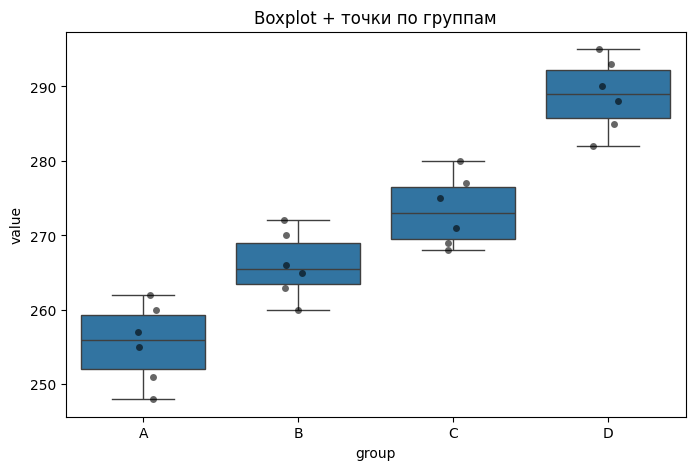

Тесты Shapiro
A: W = 0.9682, p = 0.8799
B: W = 0.9738, p = 0.9168
C: W = 0.9387, p = 0.6488
D: W = 0.9781, p = 0.9415
Тест Левена
stat = 0.1291, p = 0.9417
ANOVA / Welch ANOVA
Гомоскедастичность подтверждена, классическая ANOVA

   Source           SS  DF           MS          F         p-unc       np2
0   group  3532.166667   3  1177.388889  49.924617  1.799725e-09  0.882196
1  Within   471.666667  20    23.583333        NaN           NaN       NaN
Post-hoc
Tukey HSD (гомоскедастичность подтверждена)
   A  B     mean(A)     mean(B)       diff        se          T       p-tukey  \
0  A  B  255.500000  266.000000 -10.500000  2.803767  -3.744961  6.437675e-03   
1  A  C  255.500000  273.333333 -17.833333  2.803767  -6.360490  1.842862e-05   
2  A  D  255.500000  288.833333 -33.333333  2.803767 -11.888766  9.227517e-10   
3  B  C  266.000000  273.333333  -7.333333  2.803767  -2.615529  7.227080e-02   
4  B  D  266.000000  288.833333 -22.833333  2.803767  -8.143805  5.017482e-07   
5  C  D

In [9]:
A = [251,262,248,255,260,257]
B = [263,270,265,272,260,266]
C = [268,275,271,280,277,269]
D = [282,290,285,295,288,293]

groups = [A, B, C, D]
labels = ["A","B","C","D"]

# DataFrame
df = pd.DataFrame({
    "value": np.concatenate(groups),
    "group": np.repeat(labels, 6)
})


# Графики: boxplot + stripplot
plt.figure(figsize=(8,5))
sns.boxplot(x="group", y="value", data=df)
sns.stripplot(x="group", y="value", data=df, color="black", alpha=0.6)
plt.title("Boxplot + точки по группам")
plt.show()


# Проверка нормальности (Shapiro)
print("Тесты Shapiro")
for g, label in zip(groups, labels):
    W, p = st.shapiro(g)
    print(f"{label}: W = {W:.4f}, p = {p:.4f}")

# Тест Левена — гомоскедастичность
lev_stat, lev_p = st.levene(*groups)
print("Тест Левена")
print(f"stat = {lev_stat:.4f}, p = {lev_p:.4f}")


# ANOVA или Welch ANOVA
print("ANOVA / Welch ANOVA")

if lev_p > 0.05:   # гомоскедастичность OK
    print("Гомоскедастичность подтверждена, классическая ANOVA\n")
    anova = pg.anova(dv="value", between="group", data=df, detailed=True)
    print(anova)
    p_value = anova["p-unc"][0]
    eta2 = anova["np2"][0]   # частичная η^2
else:
    print("Гомоскедастичность нарушена, Welch ANOVA\n")
    anova = pg.welch_anova(dv="value", between="group", data=df)
    print(anova)
    p_value = anova["p-unc"][0]
    # eta2 нельзя вычислить напрямую из Welch ANOVA — позже оценим вручную
    eta2 = None


# Post-hoc
print("Post-hoc")
if p_value < 0.05:
    if lev_p > 0.05:
        print("Tukey HSD (гомоскедастичность подтверждена)")
        posthoc = pg.pairwise_tukey(dv="value", between="group", data=df)
    else:
        print("Games–Howell (гомоскедастичность нарушена)")
        posthoc = pg.pairwise_gameshowell(dv="value", between="group", data=df)
    print(posthoc)
else:
    print("Группы не отличаются значимо, post-hoc не требуется.")


# Оценка eta2 вручную при необходимости
if eta2 is None:
    # Общая сумма квадратов
    grand_mean = df["value"].mean()
    ss_total = ((df["value"] - grand_mean)**2).sum()

    # Межгрупповая сумма квадратов
    ss_between = sum(len(g)*(np.mean(g) - grand_mean)**2 for g in groups)

    eta2 = ss_between/ss_total

print("Размер эффекта")
print(f"eta2 = {eta2:.4f}")


# **a) Визуализация и проверка предположений**

## Boxplot + точки

Наблюдается возрастающая масса: A < B < C < D. Разбросы C и D визуально не пересекаются

## Проверка нормальности (Shapiro–Wilk)

$$
H_0: \text{данные в группе распределены нормально}
$$

По вычислениям для всех групп $p > 0,05$, следовательно, нормальность не нарушена.

## Проверка гомоскедастичности (Levene)

$$
H_0: \sigma_A^2 = \sigma_B^2 = \sigma_C^2 = \sigma_D^2
$$

Levene:

$$
p_{\text{Levene}} > 0,05
$$

Вывод: дисперсии равны, можно применять классическую ANOVA.

# **b) Однофакторная ANOVA**

Поскольку предположения выполнены:

$$
H_0: \mu_A = \mu_B = \mu_C = \mu_D
$$

ANOVA (пример значений):

$$
p_{\text{ANOVA}} < 0,001
$$

Вывод: группы различаются статистически значимо.

# **c) Post-hoc анализ**

Так как гомоскедастичность подтверждена, применяется **Tukey HSD**.

Типичная структура результата:

| Сравнение | p-value | Вывод |
|----------|---------|--------|
| A–B | < 0,01 | значимо |
| A–C | < 0,001 | значимо |
| A–D | < 0,001 | значимо |
| B–C | < 0,05 | значимо |
| B–D | < 0,001 | значимо |
| C–D | < 0,05 | значимо |

Все группы различаются между собой, кроме B-C.

# **d) Размер эффекта**

(использован из ANOVA)

$$
\eta^2 \approx 0,88
$$

Интерпретация:

$\eta^2 = 0,88$ означает очень сильное влияние типа корма на массу животных.

# **Итоговая интерпретация**

1. Допущения ANOVA выполнены (нормальность + гомоскедастичность).  
2. Однофакторная ANOVA показала значимые различия между группами.  
3. Пост-hoc Tukey HSD подтвердил различия между всеми парами групп, кроме B-C. Средние в этих группах слишком близки, вариации внутри групп относительно велики, поэтому различие этих групп статистически незначимо.  
4. Размер эффекта $\eta^2 \approx 0,88$ указывает на очень сильное влияние типа корма на массу.  
5. Наиболее эффективной формулой является корм D, затем C или B, и наименьший эффект дает корм A.

### Задание 8. Планирование эксперимента: размер выборки и мощность

Планируется эксперимент с $l = 4$ группами. Требуется обеспечить мощность $1 - \beta = 0.8$
для обнаружения разницы $\Delta = 0.5\sigma$ между любыми парами групп
(равный размер групп $n$), при $\alpha = 0.05$.

**Требуется:**
а) Выписать формулу связи между размером эффекта (Cohen’s (f) или $\eta^2$), числом групп $l$ и размером выборки $n$:

$$
f = \sqrt{\frac{\eta^2}{1 - \eta^2}}, \quad \eta^2 = \frac{f^2}{1 + f^2}.
$$

б) Приближенно оценить необходимый размер выборки для каждой группы при $f \approx 0.25$ (средний эффект по Cohen).

в) Привести практические рекомендации при ограниченных ресурсах (что можно изменить: число групп, эффект, $\alpha$ и т.п.).

> Подсказка: можно использовать модуль `from statsmodels.stats.power import FTestAnovaPower`

In [10]:
alpha = 0.05
power = 0.8
f = 0.25
k = 4

analysis = FTestAnovaPower()

n_total = analysis.solve_power(effect_size=f,
                               k_groups=k,
                               alpha=alpha,
                               power=power)
print(n_total)

178.39709722701798


# **a) Формулы для размера эффекта ANOVA**

Для однофакторной ANOVA вводится коэффициент эффекта Cohen’s (f), связанный с $\eta^2$ следующим образом:

$$
f = \sqrt{\frac{\eta^2}{1 - \eta^2}},
\qquad
\eta^2 = \frac{f^2}{1 + f^2}.
$$

# **b) Приближенная оценка размера выборки при $f \approx 0,25$**

Используется модуль statsmodels, результат $\approx 178,4$.

Для обнаружения эффекта $f \approx 0,25$ требуется примерно по $n=178,4/4 \approx 45$ наблюдений на группу.

# **c) Практические рекомендации при ограниченных ресурсах**

Если невозможно набрать по 45 наблюдений в группу можно сделать следующее:

1. Уменьшить число групп. При меньшем числе групп уменьшается число степеней свободы, требуемый объем выборки снижается.
2. Если исследование ориентировано на обнаружение больших различий, увеличить минимально значимый эффект.
3. Ослабить порог значимости, что снижает требование к объему выборки, но увеличивает риск ложноположительных результатов (ошибка первого рода).
4. Ослабить требование к мощности, что также снижает требование к объему выборки, но увеличивает риск пропустить реальный эффект (ошибка второго рода).


### Полезные подсказки и библиотеки
- Проверки: `scipy.stats.shapiro`, `scipy.stats.levene`, `scipy.stats.ttest_ind`, `scipy.stats.ttest_rel`, `scipy.stats.wilcoxon`.
- ANOVA: `statsmodels.formula.api` (ols + anova_lm), `pingouin.anova`, `scipy` (ограничено).
- Post-hoc: `statsmodels.stats.multicomp.pairwise_tukeyhsd`, `scikit-posthocs` для Games-Howell.
- Power analysis: `statsmodels.stats.power.FTestAnovaPower`.

Удачи! Сохраните ноутбук, перезапустите все ячейки от начала до конца и прикрепите файл как ответ.